In [1]:
import pandas as pd
from utils import *

In [2]:
# Load the beta skeleton adjacency matrix from CSV
df= pd.read_csv("../data/Dragon_4_xy_coordinates.csv")

In [3]:
df

,ID,X,Y
0,1,5.0,17.0
1,2,6.5,17.3
2,3,8.0,18.0
3,4,9.0,16.7
4,5,10.0,16.0
...,...,...,...
131,132,7.0,15.7
132,133,8.0,15.6
133,134,9.5,15.5
134,135,10.8,14.9


In [4]:
coords = df[["X", "Y"]].values
names = df["ID"].values

In [15]:

def plot_points(coords, names, etiquetas=True):
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.scatter(coords[:, 0], coords[:, 1], color='blue', s=50)
    texts = []
    if etiquetas:

        for i, (x, y) in enumerate(coords):
            texts.append(ax.text(x, y, names[i], fontsize=8))

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    # ax.set_title("Pueblos: solo puntos")
    ax.axis("equal")
    ax.grid(True)

    adjust_text(
        texts,
        ax=ax,
        only_move={'points': 'y', 'texts': 'xy'},
        arrowprops=dict(
            arrowstyle='->',
            color='gray',
            lw=0.5,
            shrinkA=10
        ),
        expand_points=(1.2, 1.2),
        force_text=1.0,
        force_points=0.2
    )
    plt.savefig('puntos_en_R2.jpg')
    plt.show()

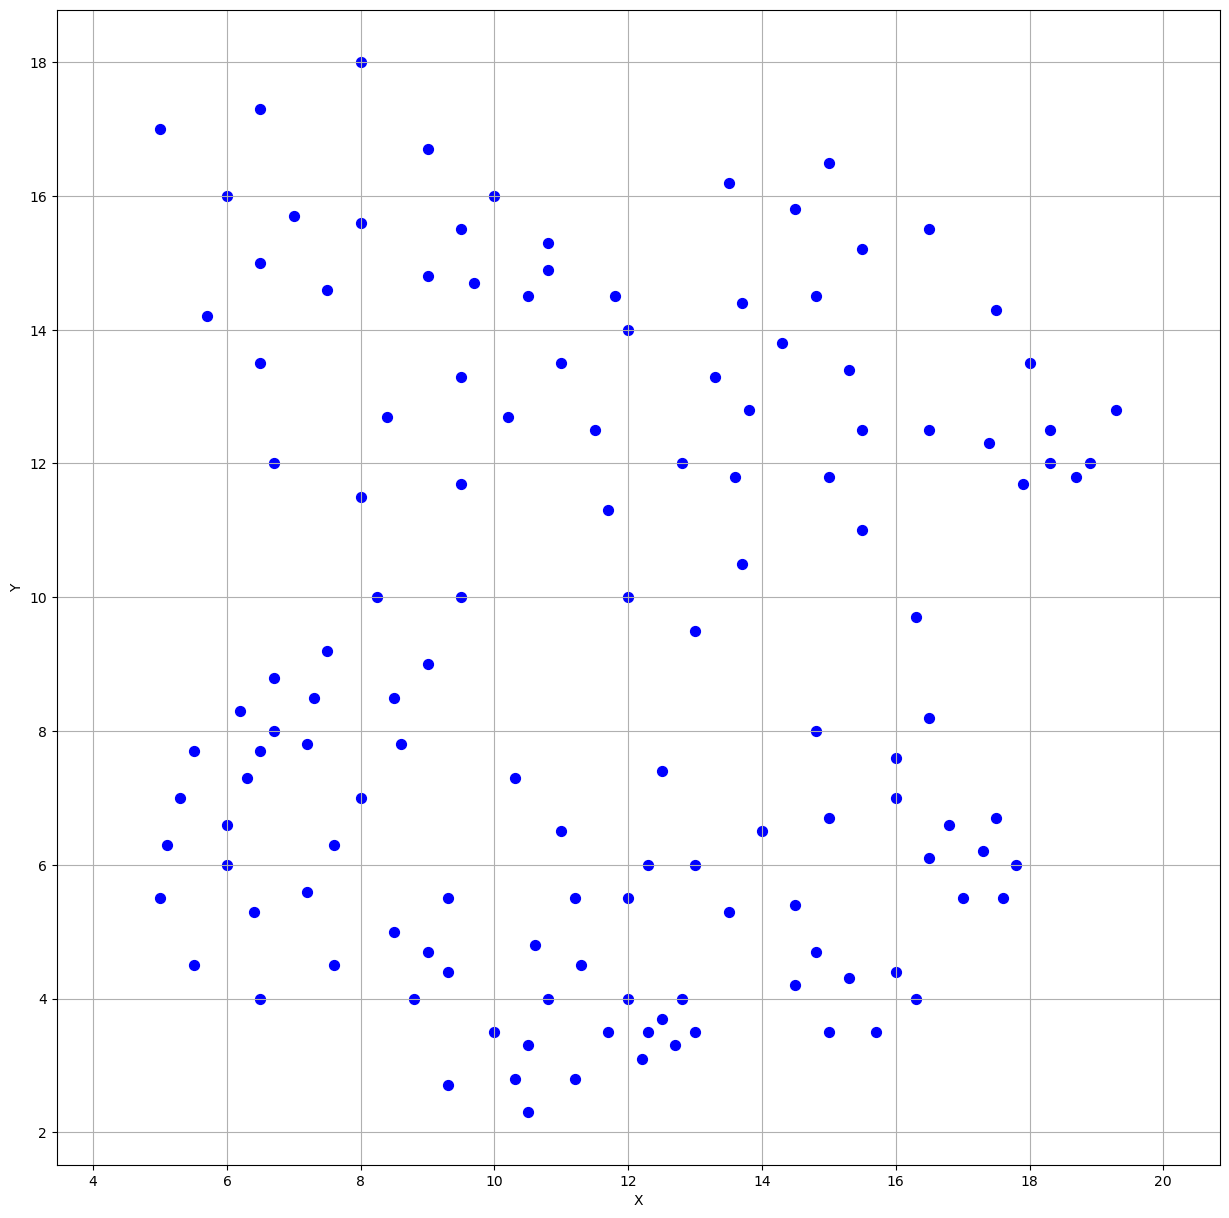

In [16]:
plot_points(coords, names, etiquetas=False)

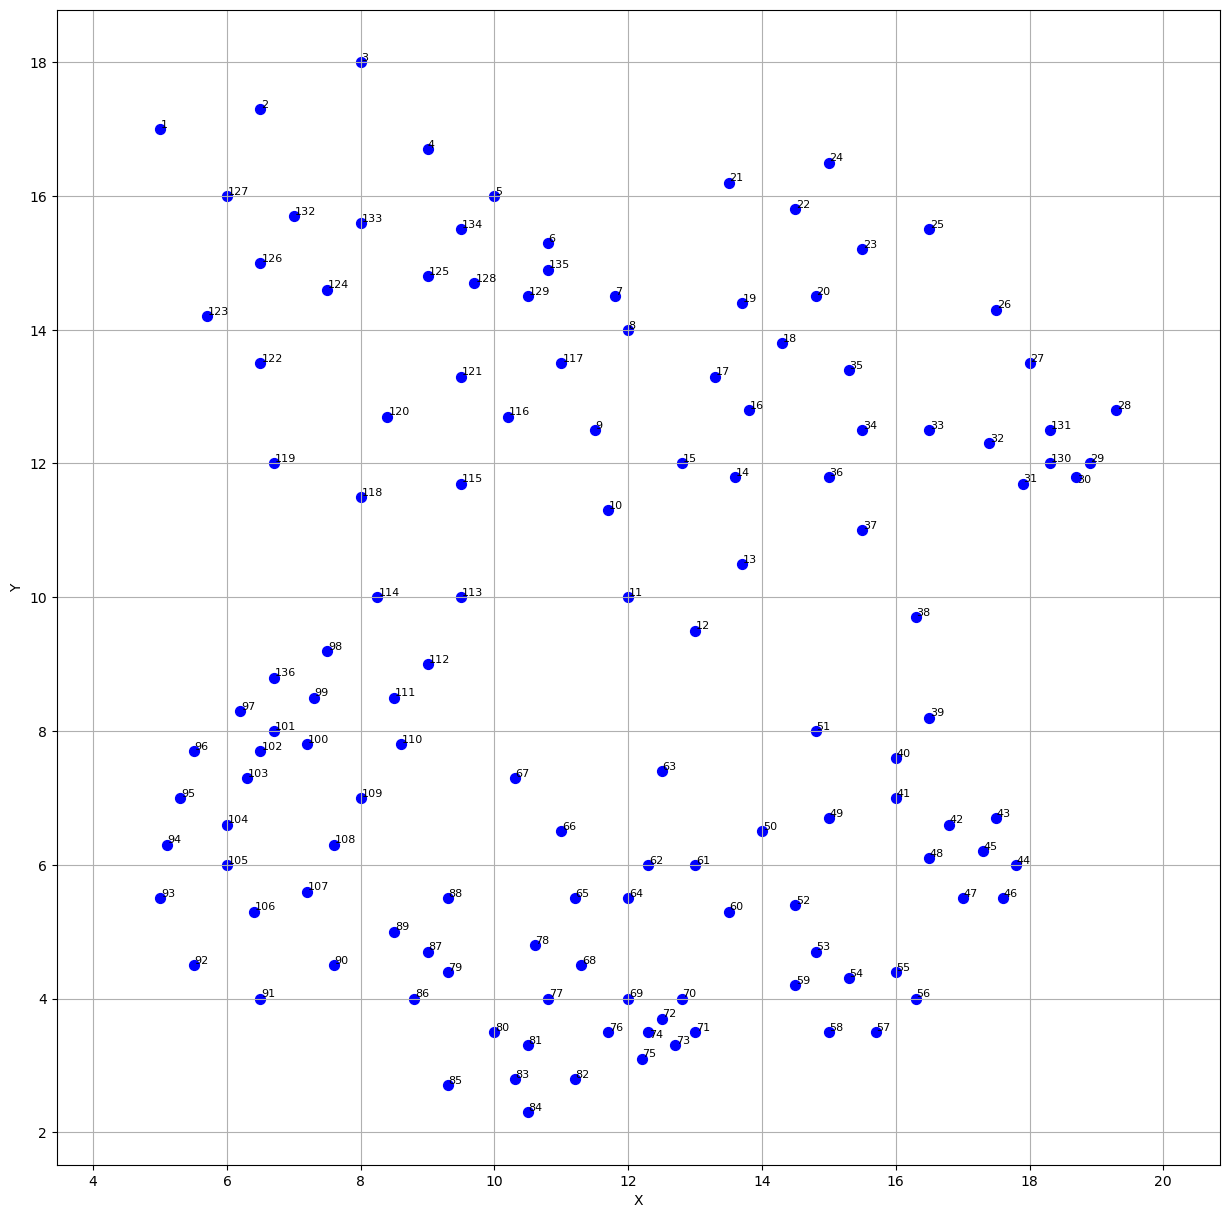

In [17]:
plot_points(coords, names, etiquetas=True)

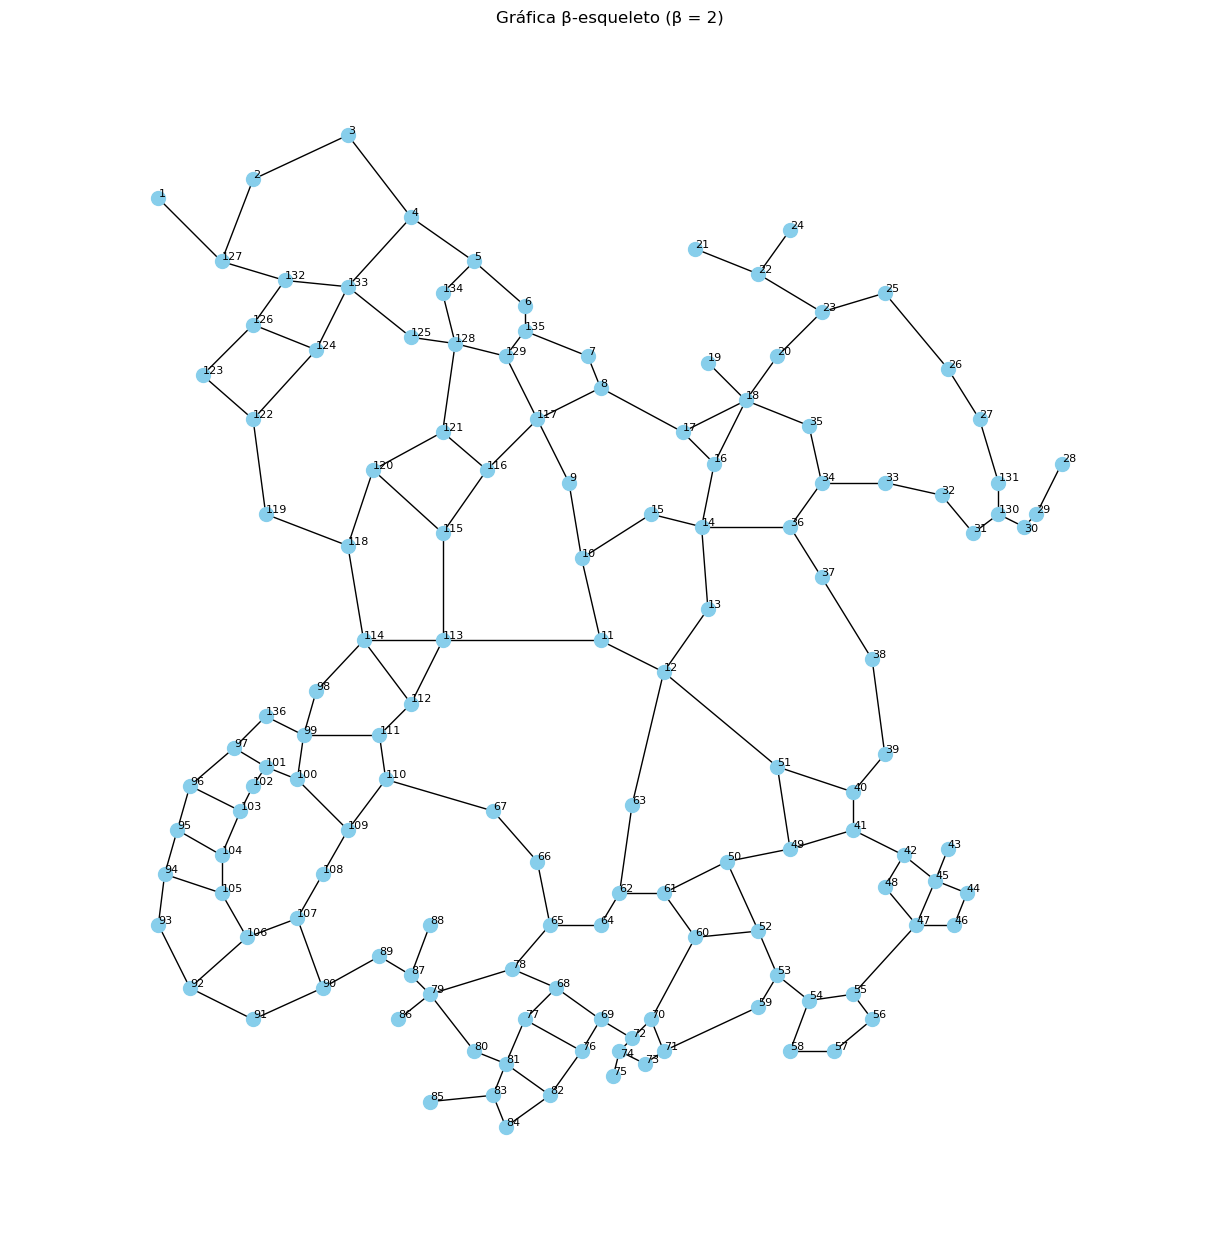

In [18]:
plot_beta_skeleton_graph(coords, names, beta=2)

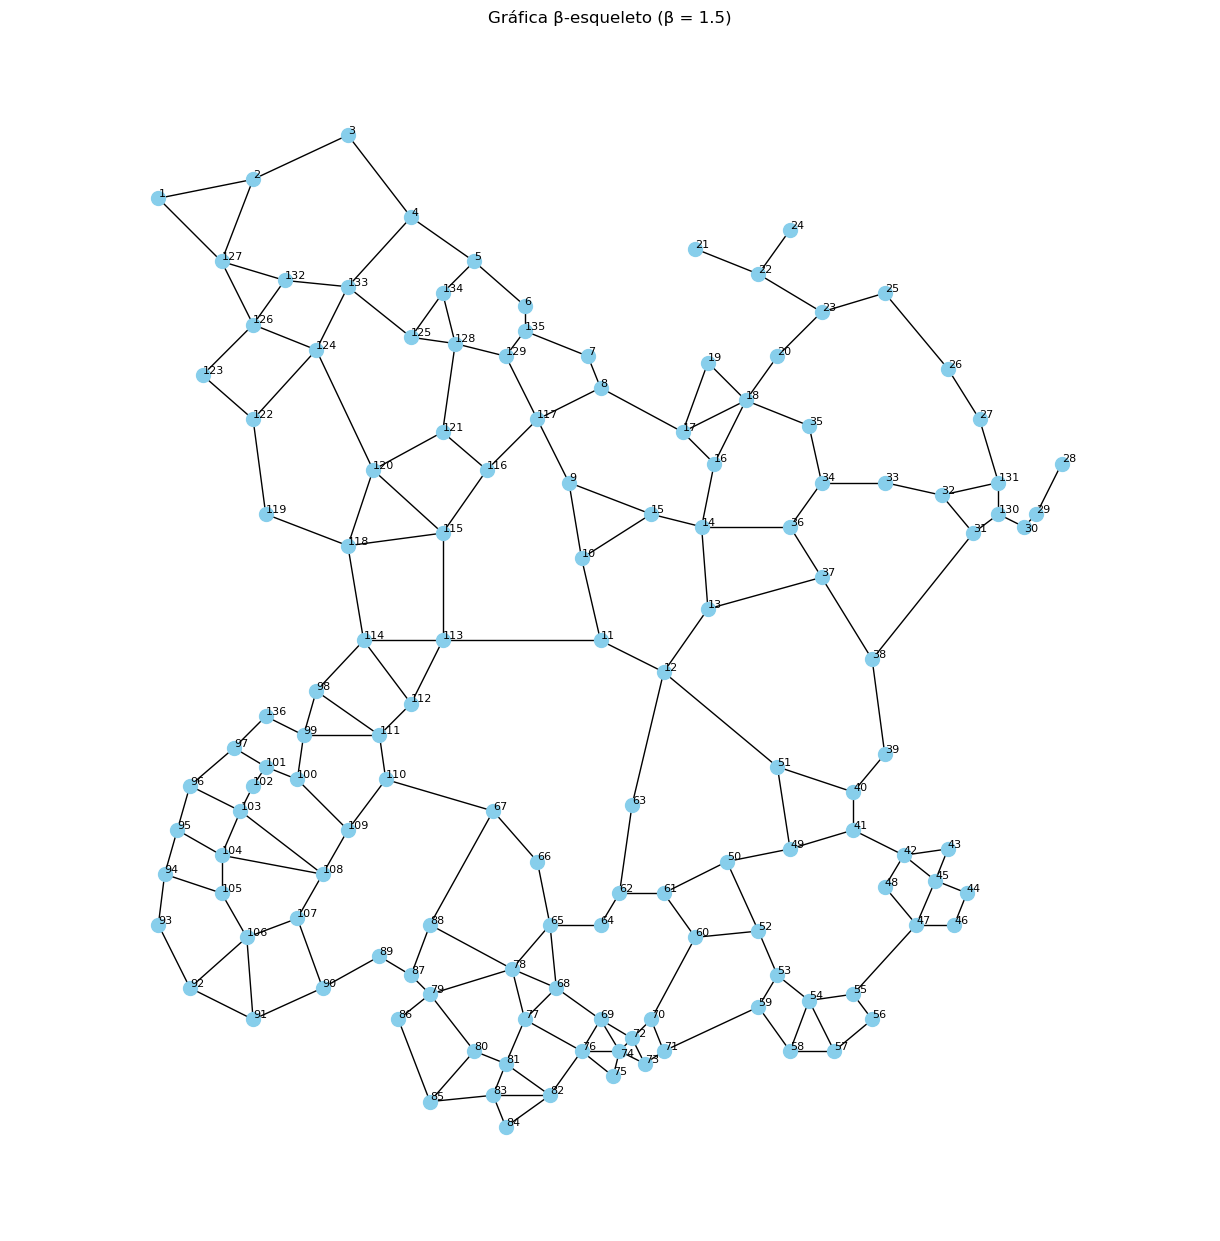

In [19]:
plot_beta_skeleton_graph(coords, names, beta=1.5)

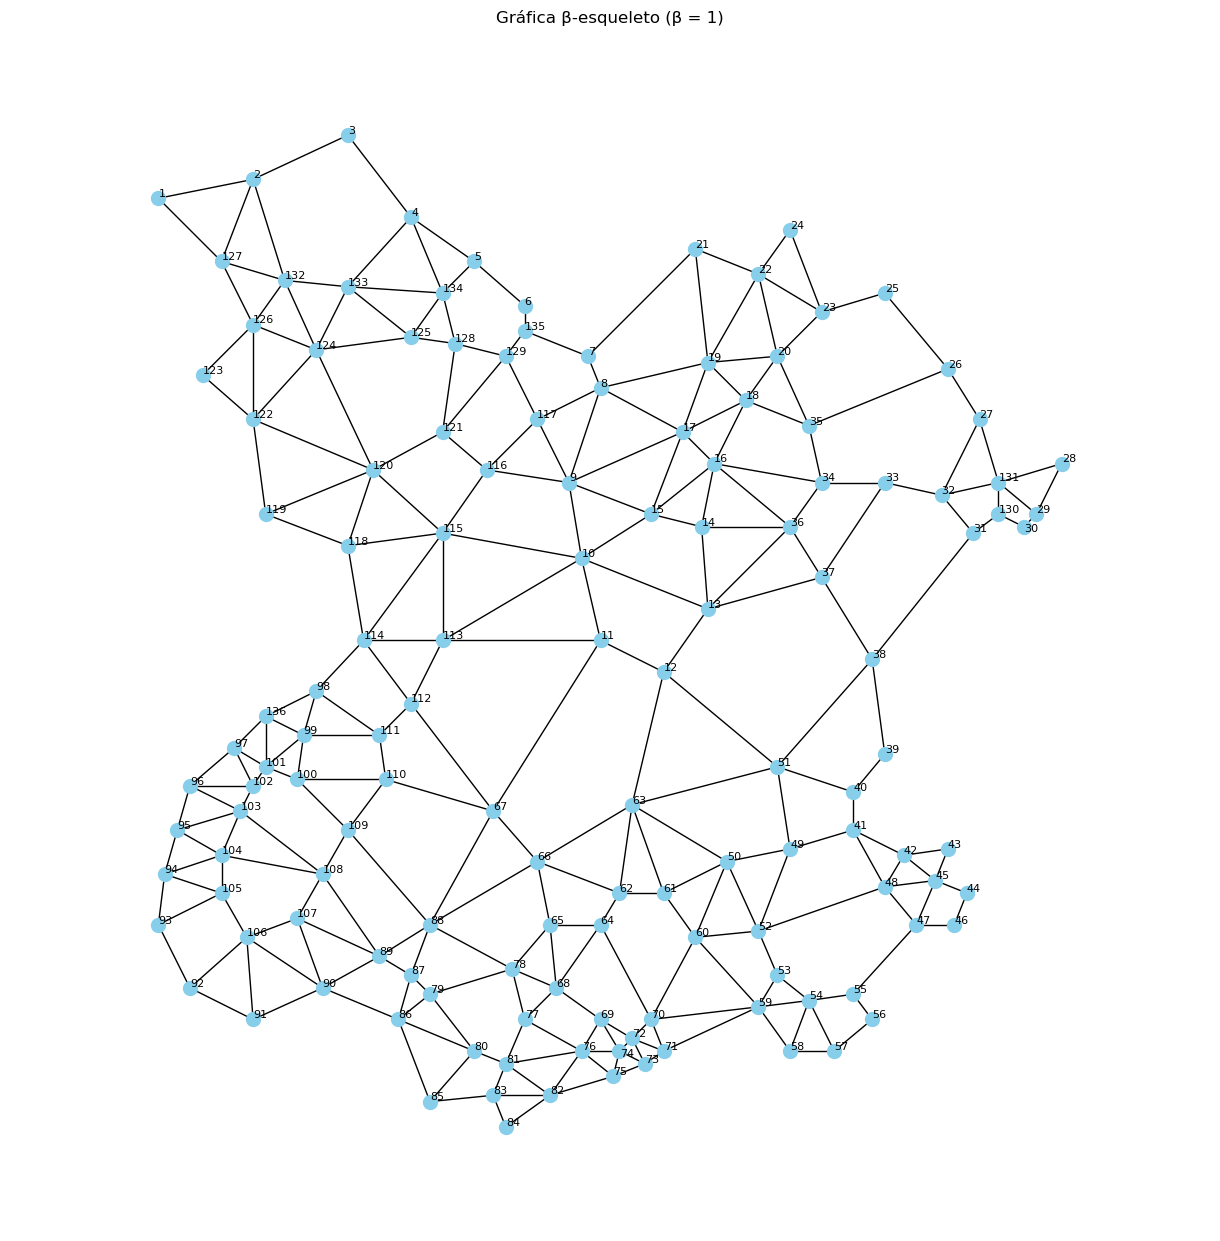

In [22]:
plot_beta_skeleton_graph(coords, names, beta=1)

In [21]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

# --- Inputs (from your df) ---
coords = df[["X", "Y"]].to_numpy()          # shape (n, 2)
names  = df["ID"].to_numpy()        # shape (n,)

# --- Full pairwise Euclidean distance matrix ---
D = cdist(coords, coords, metric="euclidean")  # (n, n) symmetric, zeros on diagonal

# --- Compute MST ---
# Note: MST returns a sparse matrix with an arbitrary edge direction.
MST = minimum_spanning_tree(csr_matrix(D))

# --- Build a tidy edge list with names and weights ---
MST_coo = MST.tocoo()
edges_df = pd.DataFrame({
    "i": MST_coo.row,                       # row index in coords
    "j": MST_coo.col,                       # col index in coords
    "u": names[MST_coo.row],                # Dot Number at row
    "v": names[MST_coo.col],                # Dot Number at col
    "weight": MST_coo.data                  # Euclidean distance
}).sort_values("weight").reset_index(drop=True)

# Optional: total tree length and basic checks
total_length = edges_df["weight"].sum()
n = len(df)
assert len(edges_df) == n - 1, "MST on a connected set of n points should have n-1 edges."

print(edges_df)
print("Total MST length:", total_length)


       i    j    u    v    weight
0     28   29   29   30  0.282843
1     71   73   72   74  0.282843
2    100  101  101  102  0.360555
3     70   72   71   73  0.360555
4      5  134    6  135  0.400000
..   ...  ...  ...  ...       ...
130    0  126    1  127  1.414214
131   61   62   62   63  1.414214
132   37   38   38   39  1.513275
133  113  117  114  118  1.520691
134    2    3    3    4  1.640122

[135 rows x 5 columns]
Total MST length: 116.27096059932765


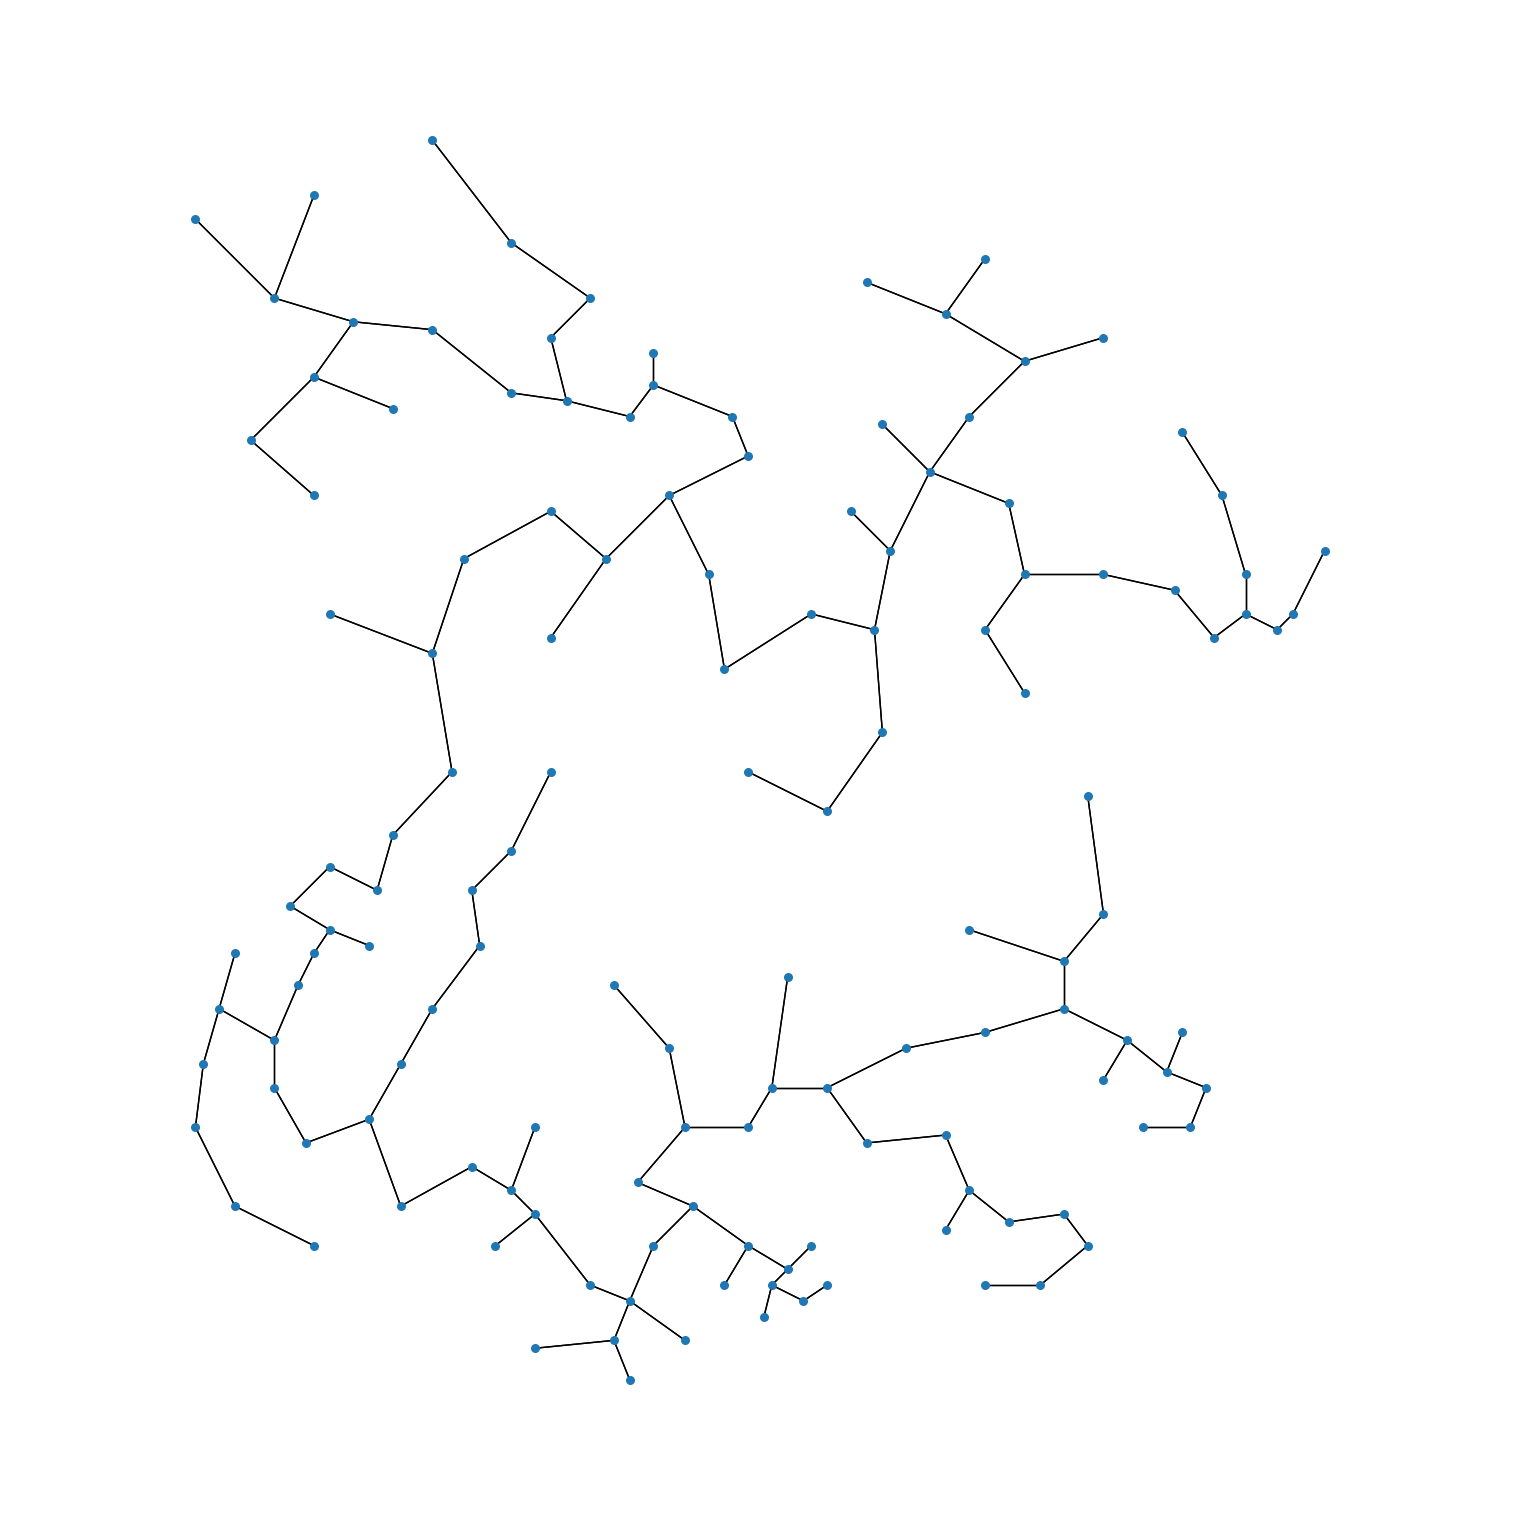

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for r, c, w in zip(MST_coo.row, MST_coo.col, MST_coo.data):
    G.add_edge(int(r), int(c), weight=float(w))

pos = {i: (coords[i, 0], coords[i, 1]) for i in range(coords.shape[0])}

plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=False, node_size=30)
nx.draw_networkx_edges(G, pos, width=1)
plt.axis("equal")
plt.savefig('my_plot.jpg')
plt.show()


<Figure size 1500x1500 with 0 Axes>

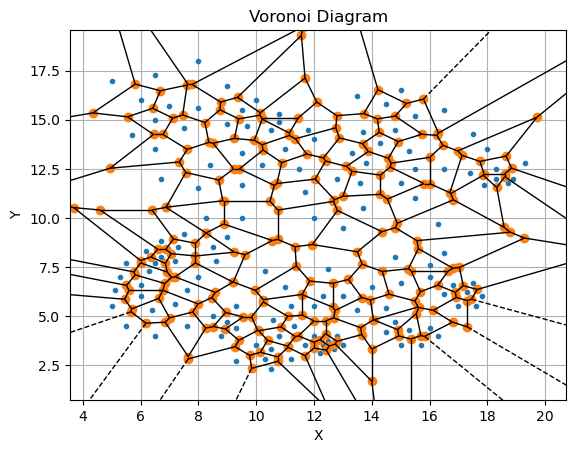

In [24]:
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d, delaunay_plot_2d
# Calcular el diagrama de Voronoi
vor = Voronoi(coords)

# === Graficar diagrama de Voronoi ===
plt.figure(figsize=(15, 15))
voronoi_plot_2d(vor, show_vertices=True, show_points=True)
plt.title("Voronoi Diagram")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.savefig('my_plot.jpg')
plt.show()

<Figure size 1500x1500 with 0 Axes>

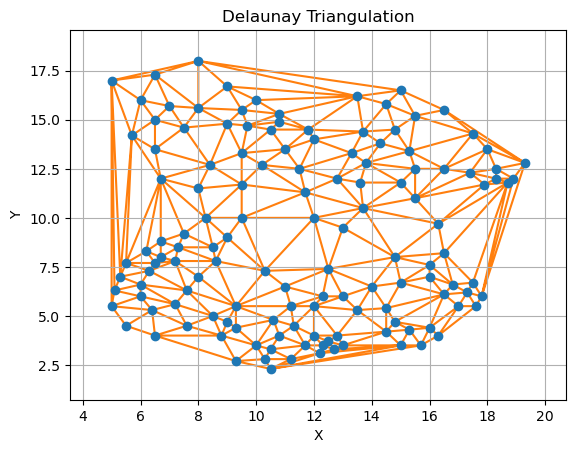

In [25]:
# Calcular la triangulación de Delaunay
delaunay = Delaunay(coords)

# === Graficar triangulación de Delaunay ===
plt.figure(figsize=(15, 15))
delaunay_plot_2d(delaunay)
plt.title("Delaunay Triangulation")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.savefig('my_plot.jpg')
plt.show()